In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("AAPL.csv")
print(df.columns)
df.head()

Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')


,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [12]:
df[' Close/Last'] = df[' Close/Last'].astype(str).str.replace('$','')
df[' Close/Last'] = pd.to_numeric(df[' Close/Last'], errors='coerce')

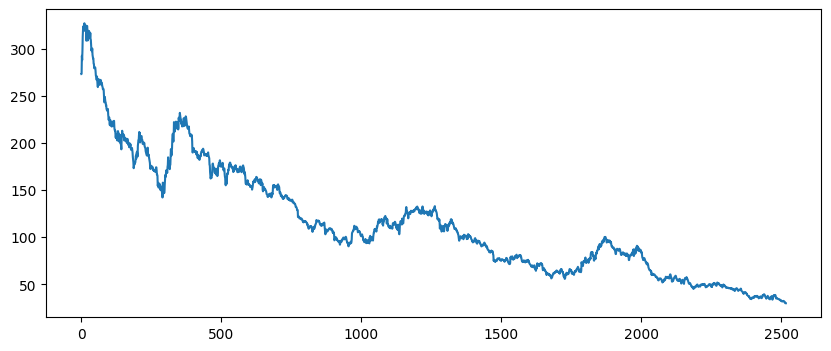

In [13]:
df[' Close/Last'].plot(figsize=(10,4))
plt.show()

In [14]:
df['Returns'] = df[' Close/Last'].pct_change()
df.head()

,Date,Close/Last,Volume,Open,High,Low,Returns
0,02/28/2020,273.36,106721200,$257.26,$278.41,$256.37,NaN
1,02/27/2020,273.52,80151380,$281.1,$286,$272.96,0.000585
2,02/26/2020,292.65,49678430,$286.53,$297.88,$286.5,0.069940
3,02/25/2020,288.08,57668360,$300.95,$302.53,$286.13,-0.015616
4,02/24/2020,298.18,55548830,$297.26,$304.18,$289.23,0.035060


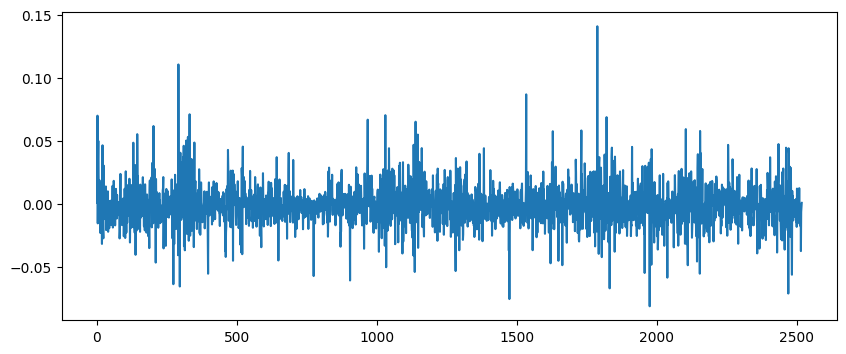

In [16]:
df['Returns'].plot(figsize=(10,4))
plt.show()

In [20]:
df['Returns'].std()
df['Returns'].mean()

np.float64(-0.0007465221828686601)

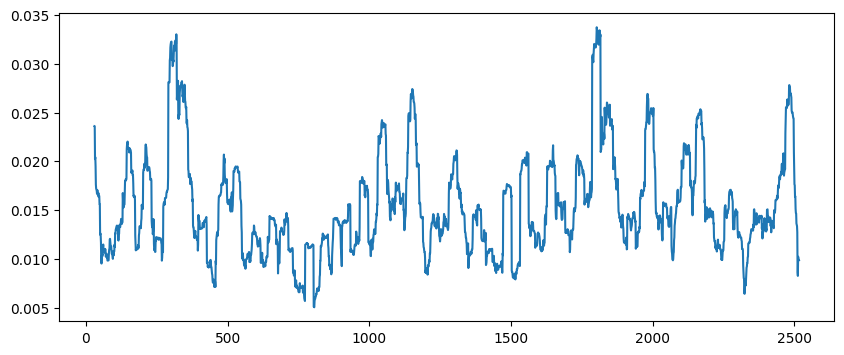

In [21]:
df['Returns'].rolling(30).std().plot(figsize=(10,4))
plt.show()

In [25]:
confidence_level = 0.01
VaR_99 = df['Returns'].quantile(confidence_level)*-1
print(f"99% Daily VaR (Percentage): {VaR_99:.4f}")
Portfolio_Value = 100000
VaR_Dollar = VaR_99 * Portfolio_Value
print(f"99% Daily VaR (USD on $100,000 portfolio): ${VaR_Dollar:,.2f}")

99% Daily VaR (Percentage): 0.0424
99% Daily VaR (USD on $100,000 portfolio): $4,241.65
